# Fast-Trips Tutorial 1: Run Fast-Trips for a Single Trip on Simple Network
## Install required software and run this notebook from a virtual environment

The easiest way to get this notebook to work locally is to [download Anaconda, for Python 2.7 ](https://www.continuum.io/downloads)

You can install all the dependencies by importing the virtual environment `ft_tutorial.yml` that is included this git repository.

To run each cell, highlight the cell and use shift-enter.

In [1]:
import os,datetime
import pandas as pd

# Specify Input Networks + Visualize
Where are the networks?  Please update `BASE_DIR` to reflect where you installed the tutorial on your machine

In [2]:
BASE_DIR         = r"/Users/elizabeth/Documents/urbanlabs/MTC/SHRP2/tutorial"
INPUT_NETWORKS   = os.path.join(BASE_DIR, "tta","input","network-simple")
INPUT_DEMAND     = os.path.join(BASE_DIR, "tta","input","demand-single")

## Validate GTFS Feed
The input networks are stored in the [GTFS-Plus](https://github.com/osplanning-data-standards/GTFS-PLUS) format.  

We use [`transitfeed`](https://github.com/google/transitfeed) for parsing and validating the GTFS component of GTFS plus.  

Note that `transitfeed` does not expect all the extra files associated with GTFS-PLUS and it will be noisy about them.

In [ ]:
import transitfeed
loader        = transitfeed.Loader(INPUT_NETWORKS, memory_db=True)
schedule      = loader.Load()
schedule.Validate()

## Create Simple Map of Routes

We use [`folium`](https://github.com/python-visualization/folium) to create a simple vizualization of the input network.  

The very simple code to create this map is stored in the file `tutorial_map.py` which is included in this repository.  You can make it fancier if you want to see more things!

Note that this would be very slow if you wanted to look at a large city's transit network, but it works for our simple example.  

Folium is a python wrapper around the popular [`Leaflet.js`](http://leafletjs.com/) mapping package.

In [5]:
import folium
import tutorial_map

mymap = tutorial_map.make_map(schedule)
mymap

NameError: name 'schedule' is not defined

# Run Fast-Trips Example: Single Trip
Here we run a simple example of a single rider going from approximately Reynolds Coliseium to the Pullen Park train.

In [3]:
from fasttrips import Run

### Parameters and Run Configurations
Let's look at the parameter files and run configurations.

In [4]:
INPUT_WEIGHTS    = os.path.join(BASE_DIR,"tta","input","demand-single","pathweight_ft.txt")
RUN_CONFIG       = os.path.join(BASE_DIR,"tta","input","demand-single","config_ft.txt")

**Parameters File:**  `pathweights_ft.txt`

In [11]:
pathweights_df = pd.read_csv(INPUT_WEIGHTS)
pathweights_df

,user_class,purpose,demand_mode_type,demand_mode,supply_mode,weight_name,weight_value
0,all,basketball,access,walk,walk_access,time_min,2
1,all,basketball,egress,walk,walk_egress,time_min,2
2,all,basketball,transit,transit,local_bus,wait_time_min,2
3,all,basketball,transit,transit,local_bus,in_vehicle_time_min,1
4,all,basketball,transfer,transfer,transfer,transfer_penalty,5
5,all,basketball,transfer,transfer,transfer,walk_time_min,2


**Run Config File:**  `config_ft.txt`

In [12]:
with open(RUN_CONFIG, 'r') as myfile:
    contents=myfile.read()
print contents

# configuration for fasttrips
[fasttrips]
max_iterations                = 1
simulation                    = True
output_passenger_trajectories = True
create_skims                  = False
prepend_route_id_to_trip_id   = True
capacity_constraint           = False
trace_ids                     = [('Tuffie','1')]
number_of_processes           = 1
bump_buffer                   = 5
debug_output_columns          = True

[pathfinding]
stochastic_pathset_size           = 1000
time_window                       = 30



Fast-Trips can be run with the Run.run_fasttrips command which is a wrapper function that runs:
  * `ft = Run.run_setup()`
  * `ft.run_setup()`
  * `ft.runassignment()`

There are six required inputs:

  * `input_network_dir`
  * `input_denand_dir`
  * `run_config`
  * `input_weights`
  * `output_dir`
  * `pathfinding_type`
  * `iters`

In [ ]:
print Run.run_fasttrips.__doc__

In [ ]:
print Run.run_setup.__doc__

In [5]:
OUTPUT_DIR    = os.path.join(BASE_DIR,"tta","output")
OUTPUT_FOLDER = "test_simplenet_noOverlap"
full_output_directory=os.path.join(OUTPUT_DIR,OUTPUT_FOLDER)

In [6]:
Run.run_fasttrips(input_network_dir= INPUT_NETWORKS,
                  input_demand_dir = INPUT_DEMAND,
                  run_config       = RUN_CONFIG,
                  input_weights    = INPUT_WEIGHTS,
                  output_dir       = OUTPUT_DIR,
                  iters            = 1,
                  output_folder    = OUTPUT_FOLDER,
                  dispersion       = 0.5)

2017-06-15 16:50:32 [INFO/MainProcess] Reading configuration file /Users/elizabeth/Documents/urbanlabs/MTC/SHRP2/tutorial/tta/input/demand-single/config_ft.txt
2017-06-15 16:50:33 [INFO/MainProcess] Reading GTFS schedule
2017-06-15 16:50:33 [INFO/MainProcess] Read       6           stops from                 stops.txt,              stops_ft.txt
2017-06-15 16:50:33 [INFO/MainProcess] Read       3          routes from                routes.txt,             routes_ft.txt
2017-06-15 16:50:33 [INFO/MainProcess] Read       1        agencies from                agency.txt
2017-06-15 16:50:33 [INFO/MainProcess] Read       0 fare attributes from       fare_attributes.txt


{'dispersion': 0.5}
routes_ft.txt
The file named routes_ft.txt was not expected.
This may be a misspelled file name or the file may be included in a
subdirectory. Please check spellings and make sure that there are no
subdirectories within the feed
transfers_ft.txt
The file named transfers_ft.txt was not expected.
This may be a misspelled file name or the file may be included in a
subdirectory. Please check spellings and make sure that there are no
subdirectories within the feed
trips_ft.txt
The file named trips_ft.txt was not expected.
This may be a misspelled file name or the file may be included in a
subdirectory. Please check spellings and make sure that there are no
subdirectories within the feed
vehicles_ft.txt
The file named vehicles_ft.txt was not expected.
This may be a misspelled file name or the file may be included in a
subdirectory. Please check spellings and make sure that there are no
subdirectories within the feed
walk_access_ft.txt
The file named walk_access_ft.txt was

2017-06-15 16:50:33 [INFO/MainProcess] Read       0      fare rules from            fare_rules.txt,       fare_periods_ft.txt
2017-06-15 16:50:33 [INFO/MainProcess] Read       2       transfers from             transfers.txt,          transfers_ft.txt
2017-06-15 16:50:33 [INFO/MainProcess] Read       1        vehicles from           vehicles_ft.txt
2017-06-15 16:50:33 [INFO/MainProcess] Read       9           trips from                 trips.txt,              trips_ft.txt
2017-06-15 16:50:33 [INFO/MainProcess] Read       1 service periods from              calendar.txt
2017-06-15 16:50:33 [WARNING/MainProcess] Adding shape_dist_traveled in miles
2017-06-15 16:50:33 [INFO/MainProcess] Read      18      stop times from            stop_times.txt,         stop_times_ft.txt
2017-06-15 16:50:33 [INFO/MainProcess] Read       3     walk access from        walk_access_ft.txt
2017-06-15 16:50:33 [INFO/MainProcess] Read       0            DAPs from drive_access_points_ft.txt
2017-06-15 16:50:33 [

{'capacity_gap': 0.0,
 'passengers_arrived': 1,
 'passengers_demand': 1,
 'passengers_missed': 0,
 'paths_found': 1}

# Examine Results

## Vehicle Trip Level
The `veh_trips.csv` file is a record of every stop on every transit trip in the network.  It contains information about arrivals and departures as well as ridership totals.  It is a useful file for examining capacity and operational issues and can be fed back into a dynamic traffic assignment procedure.

In [15]:

vehicles_df = pd.read_csv(os.path.join(full_output_directory,"veh_trips.csv"), 
                                       sep=",", 
                                       parse_dates=['arrival_time', 'departure_time'],
                                       date_parser=lambda x: datetime.datetime.strptime(x, '%H:%M:%S') )
vehicles_with_boardings_df=vehicles_df[vehicles_df["onboard"]>0]
vehicles_with_boardings_df[['iteration','pathfinding_iteration','arrival_time','departure_time','route_id','trip_id','stop_id','boards','onboard','standees']]

,iteration,pathfinding_iteration,arrival_time,departure_time,route_id,trip_id,stop_id,boards,onboard,standees
20,1,1,1900-01-01 07:19:55,1900-01-01 07:20:00,Green,G3,B2,1,1,0
30,1,1,1900-01-01 07:03:55,1900-01-01 07:04:00,Blue,B2,A,1,1,0
38,1,2,1900-01-01 07:19:55,1900-01-01 07:20:00,Green,G3,B2,1,1,0
48,1,2,1900-01-01 07:03:55,1900-01-01 07:04:00,Blue,B2,A,1,1,0


## Plot Ridership by Trip
As you can see from examining the vehicle trips file, there were two pathfinding iterations, which will be discussed in a later tutorial.  Let's look at the results from the following one, `pathfinding_iteration==1`. 

The resulting plot is not very interesting, since we just sent one trip through, but you can see that they took Trip B2 followed by G3.

//anaconda/envs/fast-trips-develop/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


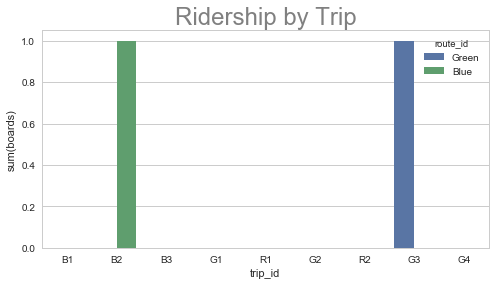

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid")
fig, axs = plt.subplots(nrows=1,figsize=(8,4))
sns.barplot(ax=axs, x="trip_id", 
            order=["B1","B2","B3","G1","R1","G2","R2","G3","G4"],
            y="boards", hue="route_id",  
            estimator=sum, 
            ci=None, 
            data=vehicles_with_boardings_df[vehicles_with_boardings_df["pathfinding_iteration"]==1])
axs.set_title('Ridership by Trip', fontsize=24,color="Gray")

## Person Level

The person-level results use the [`dyno-path`](https://github.com/osplanning-data-standards/dyno-path) format.  

There are two levels of files: *path* and *link*.  

Additionally, we store both the *chosen* path and links as well as all the paths and links that were available choices within Fast-Trips. 



### Links on Chosen Path
Links represent a segment of the path using a single transit `trip_id` or access, egress, or transfer linkmode.  

In [17]:
CHOSEN_LINKS = "chosenpaths_links.csv"
chosen_link_df = pd.read_csv(os.path.join(full_output_directory,CHOSEN_LINKS), 
                                       sep=",", 
                                       parse_dates=['new_A_time', 'new_B_time'],
                                       date_parser=lambda x: datetime.datetime.strptime(x, '%H:%M:%S') )

chosen_link_df

,person_id,person_trip_id,trip_list_id_num,trace,pf_iteration,pathnum,linkmode,trip_id_num,A_id_num,B_id_num,A_seq,B_seq,pf_A_time,pf_B_time,pf_linktime min,pf_linkfare,pf_linkcost,pf_linkdist,pf_waittime min,linknum,A_id,B_id,A_lat,A_lon,B_lat,B_lon,trip_id,route_id,mode_num,mode,split_first,chosen,bump_iter,board_state,board_time,overcap,overcap_frac,alight_time,alight_delay_min,new_A_time,new_B_time,new_linktime min,new_waittime min,missed_xfer,fare,fare_period,from_fare_period,transfer_fare_type,transfer_fare,free_transfer,distance,sim_cost,iteration,pathfinding_iteration
0,Tuffie,1,1,True,1.01,0,access,NaN,7,1,-1,-1,07:00:00,07:04:00,4.0,0.0,8.0,0.200000,NaN,0,O,A,NaN,NaN,35.782796,-78.670429,NaN,NaN,101.0,walk_access,True,iter1.01 sim0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1900-01-01 07:00:00,1900-01-01 07:04:00,4.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0.200000,8.0,1,1
1,Tuffie,1,1,True,1.01,0,transit,7.0,1,2,1,2,07:04:00,07:12:00,8.0,0.0,8.0,0.219219,0.0,1,A,B,35.782796,-78.670429,35.781325,-78.666964,B2,Blue,301.0,local_bus,True,iter1.01 sim0,NaN,board_easy,07:04:00,-9.0,NaN,07:12:00,0.0,1900-01-01 07:04:00,1900-01-01 07:12:00,8.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,0.219219,8.0,1,1
2,Tuffie,1,1,True,1.01,0,transfer,NaN,2,4,-1,-1,07:12:00,07:20:00,8.0,0.0,21.0,0.400000,NaN,2,B,B2,35.781325,-78.666964,35.779053,-78.667243,NaN,NaN,1.0,transfer,True,iter1.01 sim0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1900-01-01 07:12:00,1900-01-01 07:20:00,8.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0.400000,21.0,1,1
3,Tuffie,1,1,True,1.01,0,transit,2.0,4,5,1,2,07:20:00,07:28:00,8.0,0.0,8.0,0.320010,0.0,3,B2,C2,35.779053,-78.667243,35.779584,-78.661572,G3,Green,301.0,local_bus,True,iter1.01 sim0,NaN,board_easy,07:20:00,-9.0,NaN,07:28:00,0.0,1900-01-01 07:20:00,1900-01-01 07:28:00,8.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,0.320010,8.0,1,1
4,Tuffie,1,1,True,1.01,0,egress,NaN,5,8,-1,-1,07:28:00,07:30:00,2.0,0.0,4.0,0.100000,NaN,4,C2,D,35.779584,-78.661572,NaN,NaN,NaN,NaN,201.0,walk_egress,True,iter1.01 sim0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1900-01-01 07:28:00,1900-01-01 07:30:00,2.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0.100000,4.0,1,1


In [19]:
import graphs_ft

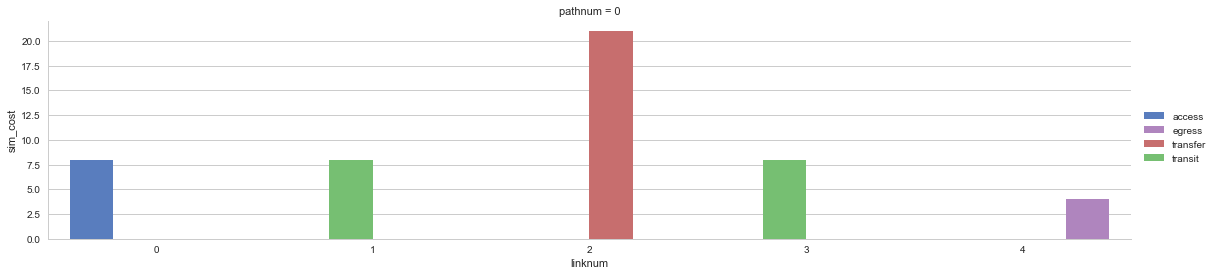

In [20]:
graphs_ft = reload(graphs_ft)
graphs_ft.path_link_cost_single_pax(chosen_link_df,pax="Tuffie",value="sim_cost")

The plot above shows the chosen path over time with the thicknesses representing the perceived cost of each segment.

## Path Choice

### Path Set
**Path** files contain information about the entire path as scored by the individual who is taking a particular trip.

The fields `sim_cost` and `probability` summarize how the path was scored.    

A quick description of the path is available in the `description` field.

Fast-Trips outputs two path files: `chosenpaths_paths.csv` and `pathset_paths.csv`.  Since our simple example only has a few paths, let's see how each of them were evaluated.

In [21]:
PATHS  = r"pathset_paths.csv"

pathset_paths_df = pd.read_csv(os.path.join(full_output_directory,PATHS), sep=",")
pd.set_option('display.max_colwidth',160) #widen so you can see whole description
pathset_paths_df[["person_id","person_trip_id","pathnum","description","sim_cost","logsum","probability"]]

,person_id,person_trip_id,pathnum,description,sim_cost,logsum,probability
0,Tuffie,1,0,O walk_access A local_bus Blue_B2 B transfer B2 local_bus Green_G3 C2 walk_egress D,49.0,0.0,0.675197
1,Tuffie,1,1,O walk_access A local_bus Blue_B2 B transfer B1 local_bus Red_R2 C1 walk_egress D,51.0,0.0,0.323129
2,Tuffie,1,2,O walk_access A local_bus Blue_B2 B transfer B2 local_bus Green_G4 C2 walk_egress D,61.0,0.0,0.001674


### Choice Set Link Files
We can look at the components of each of these paths to find out what is driving the total cost by using the **pathset-links** file: `pathset_links.csv`.

In [22]:
LINKS  = r"pathset_links.csv"
linkfile_df = pd.read_csv(os.path.join(full_output_directory,LINKS),
                                       sep=",", 
                                       parse_dates=['new_A_time', 'new_B_time'],
                                       date_parser=lambda x: datetime.datetime.strptime(x, '%H:%M:%S') )

## Add Fast-Trips path probability information to Fast-Trips link file
linkfile_df = pd.merge(left  = linkfile_df,
                       right = pathset_paths_df,
                       how   = "left",
                       left_on = ["person_id","person_trip_id","pathnum","chosen","missed_xfer","iteration","pathfinding_iteration","simulation_iteration"],
                       right_on = ["person_id","person_trip_id","pathnum","chosen","missed_xfer","iteration","pathfinding_iteration","simulation_iteration"],
                       suffixes = ["_L","_P"])

linkfile_df
#linkfile_df.columns

,person_id,person_trip_id,trip_list_id_num_L,trace_L,pf_iteration_L,pathnum,linkmode,trip_id_num,A_id_num,B_id_num,A_seq,B_seq,pf_A_time,pf_B_time,pf_linktime min,pf_linkfare,pf_linkcost,pf_linkdist,pf_waittime min,linknum,A_id,B_id,A_lat,A_lon,B_lat,B_lon,trip_id,route_id,mode_num,mode,split_first,chosen,bump_iter_L,board_state,board_time,overcap,overcap_frac,alight_time,alight_delay_min,new_A_time,new_B_time,new_linktime min,new_waittime min,missed_xfer,fare,fare_period,from_fare_period,transfer_fare_type,transfer_fare,free_transfer,distance,sim_cost_L,iteration,pathfinding_iteration,simulation_iteration,trip_list_id_num_P,trace_P,pathdir,pathmode,pf_iteration_P,pf_cost,pf_fare,pf_probability,pf_initcost,pf_initfare,description,bump_iter_P,sim_cost_P,ln_PS,logsum_component,logsum,probability
0,Tuffie,1,1,True,1.01,0,access,NaN,7,1,-1,-1,07:00:00,07:04:00,4.0,0.0,8.0,0.200000,NaN,0,O,A,NaN,NaN,35.782796,-78.670429,NaN,NaN,101.0,walk_access,True,iter1.01 sim0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1900-01-01 07:00:00,1900-01-01 07:04:00,4.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0.200000,8.0,1,1,2,1,True,2,transit,1.01,49.0,0.0,0.729736,49.0,0.0,O walk_access A local_bus Blue_B2 B transfer B2 local_bus Green_G3 C2 walk_egress D,NaN,49.0,-0.836248,0.0,0.0,0.675197
1,Tuffie,1,1,True,1.01,0,transit,7.0,1,2,1,2,07:04:00,07:12:00,8.0,0.0,8.0,0.219219,0.0,1,A,B,35.782796,-78.670429,35.781325,-78.666964,B2,Blue,301.0,local_bus,True,iter1.01 sim0,NaN,board_easy,07:04:00,-9.0,NaN,07:12:00,0.0,1900-01-01 07:04:00,1900-01-01 07:12:00,8.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,0.219219,8.0,1,1,2,1,True,2,transit,1.01,49.0,0.0,0.729736,49.0,0.0,O walk_access A local_bus Blue_B2 B transfer B2 local_bus Green_G3 C2 walk_egress D,NaN,49.0,-0.836248,0.0,0.0,0.675197
2,Tuffie,1,1,True,1.01,0,transfer,NaN,2,4,-1,-1,07:12:00,07:20:00,8.0,0.0,21.0,0.400000,NaN,2,B,B2,35.781325,-78.666964,35.779053,-78.667243,NaN,NaN,1.0,transfer,True,iter1.01 sim0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1900-01-01 07:12:00,1900-01-01 07:20:00,8.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0.400000,21.0,1,1,2,1,True,2,transit,1.01,49.0,0.0,0.729736,49.0,0.0,O walk_access A local_bus Blue_B2 B transfer B2 local_bus Green_G3 C2 walk_egress D,NaN,49.0,-0.836248,0.0,0.0,0.675197
3,Tuffie,1,1,True,1.01,0,transit,2.0,4,5,1,2,07:20:00,07:28:00,8.0,0.0,8.0,0.320010,0.0,3,B2,C2,35.779053,-78.667243,35.779584,-78.661572,G3,Green,301.0,local_bus,True,iter1.01 sim0,NaN,board_easy,07:20:00,-9.0,NaN,07:28:00,0.0,1900-01-01 07:20:00,1900-01-01 07:28:00,8.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,0.320010,8.0,1,1,2,1,True,2,transit,1.01,49.0,0.0,0.729736,49.0,0.0,O walk_access A local_bus Blue_B2 B transfer B2 local_bus Green_G3 C2 walk_egress D,NaN,49.0,-0.836248,0.0,0.0,0.675197
4,Tuffie,1,1,True,1.01,0,egress,NaN,5,8,-1,-1,07:28:00,07:30:00,2.0,0.0,4.0,0.100000,NaN,4,C2,D,35.779584,-78.661572,NaN,NaN,NaN,NaN,201.0,walk_egress,True,iter1.01 sim0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1900-01-01 07:28:00,1900-01-01 07:30:00,2.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0.100000,4.0,1,1,2,1,True,2,transit,1.01,49.0,0.0,0.729736,49.0,0.0,O walk_access A local_bus Blue_B2 B transfer B2 local_bus Green_G3 C2 walk_egress D,NaN,49.0,-0.836248,0.0,0.0,0.675197
5,Tuffie,1,1,True,1.01,1,access,NaN,7,1,-1,-1,07:00:00,07:04:00,4.0,0.0,8.0,0.200000,NaN,0,O,A,NaN,NaN,35.782796,-78.670429,NaN,NaN,101.0,walk_access,True,unchosen,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1900-01-01 07:00:00,1900-01-01 07:04:00,4.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0.200000,8.0,1,1,2,1,True,2,transit,1.01,51.0,0.0,0.268455,51.0,0.0,O walk_access A local_bus Blue_B2 B transfer B1 local_bus Red_R2 C1 walk_egress D,NaN,51.0,-0.310155,0.0,0.0,0.323129
6,Tuffie,1,1,True,1.01,1,transit,7.0,1,2,1,2,07:04:00,07:12:00,8.0,0.0,8.0,0.219219,0.0,1,A,B,35.782796,-78.670429,35.781325,-78.666964,B2,Blue,301.0,local_bus,True,unchosen,NaN,board_easy,07:04:00,-9.0,NaN,07:12:00,0.0,1900-01-01 07:04:00,1900-01-01 07:12:00,8.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,0.219219,8.0,1,1,2,1,True,2,transit,1.01,51.0,0.0,0.268455,51.0,0.0,O walk_access A local_bus B

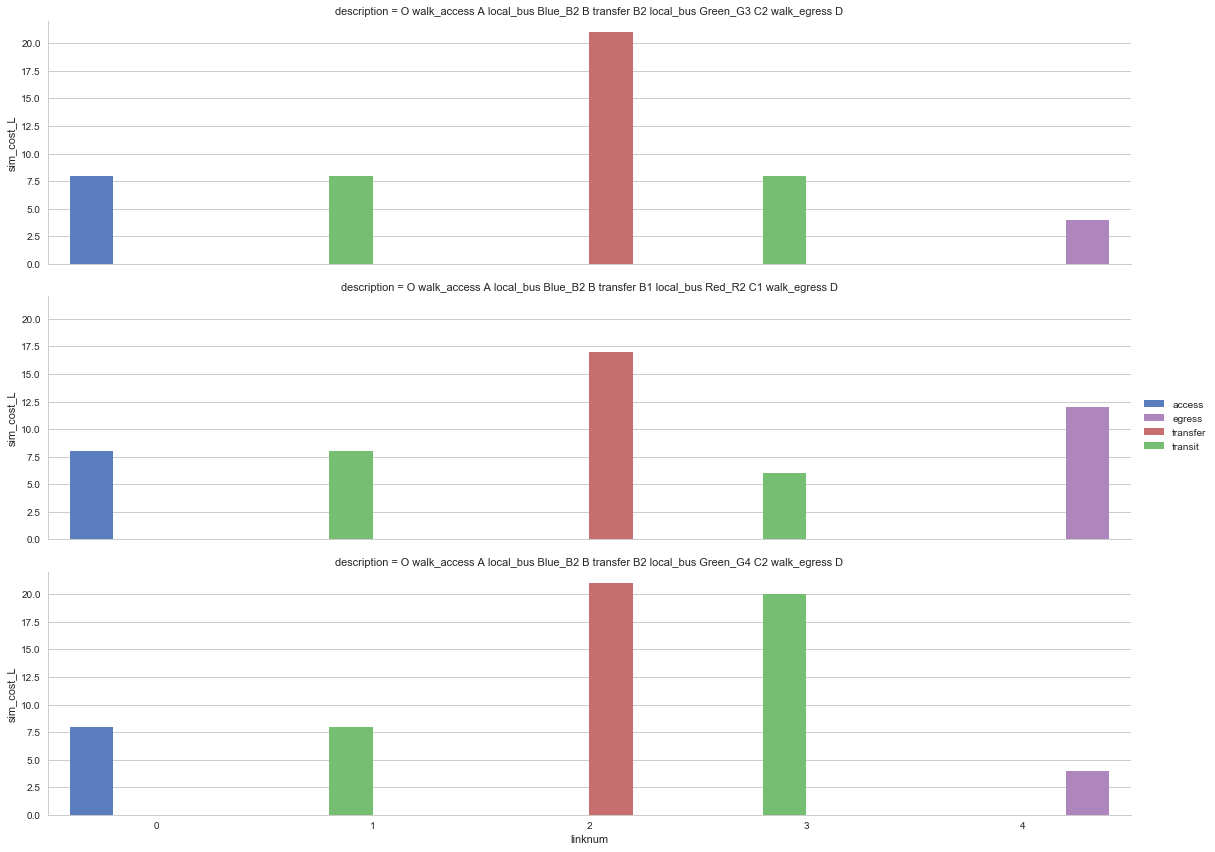

In [23]:
graphs_ft = reload(graphs_ft)
graphs_ft.path_choice_single_pax(linkfile_df,pax="Tuffie",value="sim_cost_L")

# QUESTIONS
**Question 1a:** What is the best route according to Tuffie?

**Question 1b:** Why? What drives it being the best?